In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
cheifs_csvs = os.listdir('../CSVs/CheifsCSVs')
cheifs_dfs = [pd.read_csv('../CSVs/CheifsCSVs/'+csv) for csv in cheifs_csvs]

In [3]:
cheifs_dfs[0].head() # 0 = Bears #

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,Sentiment_Analysis,Positive_Sentiment,Compound_Sentiment Score
0,0,1582044913490833408,2022-10-17 16:24:35+00:00,MagentaJon,"A divided house, both games yesterday were goo...","['Cheifs', 'Cowboys']",7,0,NaN,NaN,divided house both games yesterday were good y...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",True,0.4404
1,1,1581873101939560450,2022-10-17 05:01:51+00:00,wetbets137,If the 49ers beat the cheifs next weekend this...,"['49ers', 'cheifs', 'nfl', 'questforsix']",0,0,NaN,NaN,if 49ers beat cheifs next weekend this game wi...,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp...",False,-0.2263
2,2,1581804667155406848,2022-10-17 00:29:55+00:00,Murk_Ezu,I swear #JoshAllen &amp; #PatrickMahomes are m...,"['JoshAllen', 'PatrickMahomes', 'football', 'B...",2,0,NaN,NaN,i swear amp are magicians wit that was another...,"{'neg': 0.048, 'neu': 0.44, 'pos': 0.512, 'com...",True,0.9118


In [4]:
b_game_1 = cheifs_dfs[0]

In [5]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
MagentaJon    1
Murk_Ezu      1
wetbets137    1
dtype: int64


Series([], dtype: int64)

In [6]:
cheifs_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'Sentiment_Analysis', 'Positive_Sentiment', 'Compound_Sentiment Score'],
      dtype='object')

In [7]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

In [8]:
cheifs_csvs

['CheifsBills.csv',
 'CheifsBucs.csv',
 'CheifsCardinals.csv',
 'CheifsChargers.csv',
 'CheifsColts.csv',
 'CheifsJags.csv',
 'CheifsNiners.csv',
 'CheifsRaiders.csv',
 'CheifsTitans.csv']

In [9]:
# users = cheifs_dfs[0].groupby(['User']).size().sort_values(ascending=False).head(5)
# l = list(users.index.values) 
# make_scatter_and_pie_figure(remove_users_from_df(cheifs_dfs[0], l), 'Cheifs vs. Bears - Removed Users')

KeyError: 'Compound_Sentiment_Score'

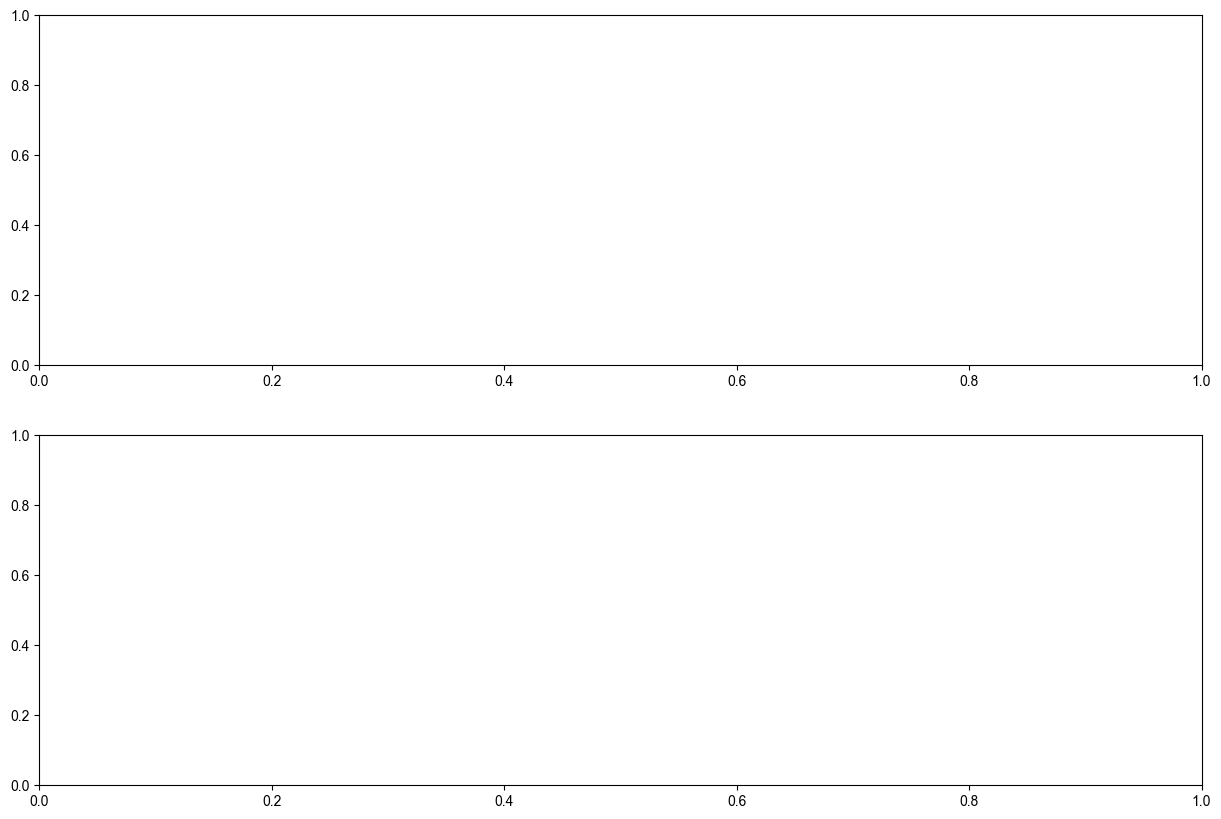

In [10]:
make_scatter_and_pie_figure(cheifs_dfs[1], 'Cheifs vs. Bills', save = True)

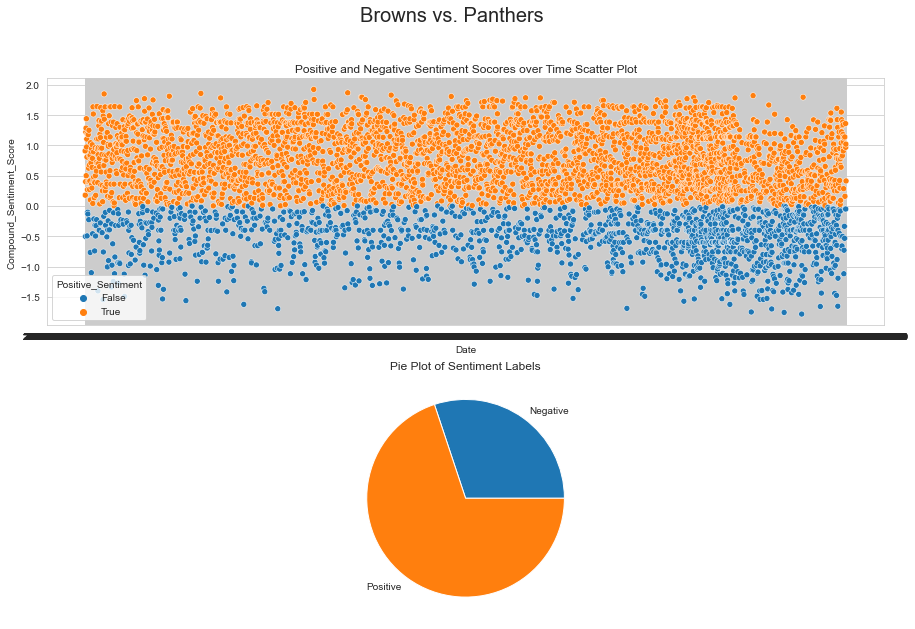

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[2], 'Cheifs vs. Bucs', save = True)

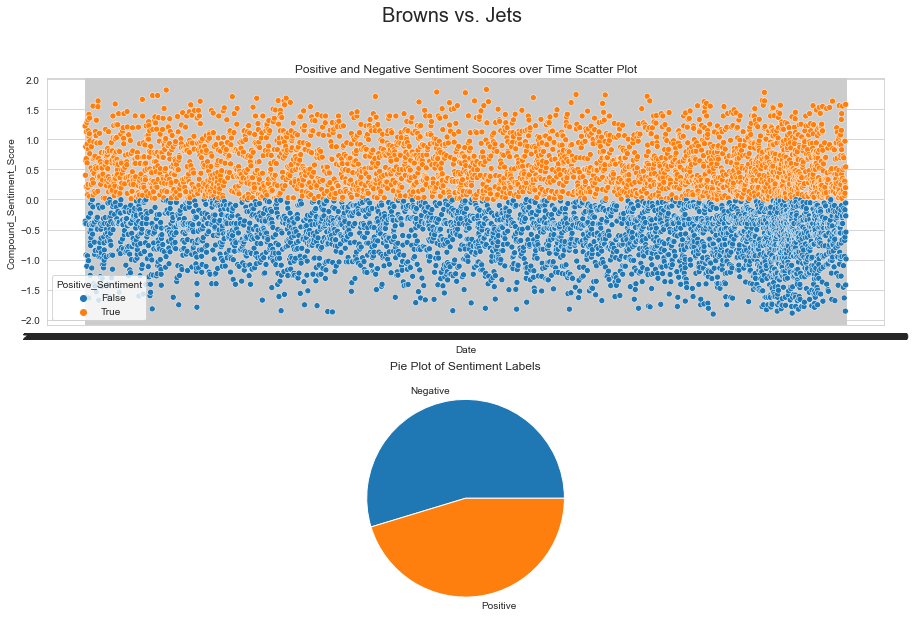

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[3], 'Cheifs vs. Cardinals', save = True)

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[4], 'Cheifs vs. Chargers', save = True)

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[5], 'Cheifs vs. Colts', save = True)

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[6], 'Cheifs vs. Jags', save = True)

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[7], 'Cheifs vs. Niners', save = True)

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[8], 'Cheifs vs. Raiders', save = True)

In [ ]:
make_scatter_and_pie_figure(cheifs_dfs[9], 'Cheifs vs. Titans', save = True)